<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#XYZ-анализ" data-toc-modified-id="XYZ-анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>XYZ-анализ</a></span><ul class="toc-item"><li><span><a href="#Визуализация-групп" data-toc-modified-id="Визуализация-групп-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация групп</a></span><ul class="toc-item"><li><span><a href="#Группа-X" data-toc-modified-id="Группа-X-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Группа X</a></span></li></ul></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

__Импорты и функции__

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mlp

#dataset settings
pd.set_option('display.max_columns', 100) #макс кол-во колонок в выводимых данных 
pd.set_option('display.max_rows', 30) #макс кол-во строк в выводимых данных
pd.set_option('display.width', 60) #макс кол-во символов в строке

#warnings and other settings
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter('ignore')
pd.options.mode.chained_assignment = None

In [2]:
mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 30
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
#mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 30
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
#mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
#mlp.rcParams['axes.titlecolor'] = '#00B050'
#mlp.rcParams['axes.labelcolor'] = '#00B050'

Зададим порог отнесения к группам. 

In [3]:
X_LIMIT = 0.15
Y_LIMIT = 0.30

Напишем функции, которые будем использовать:

In [4]:
def get_xyz(item, x_limit=0.1, y_limit=0.25): 
    if 0 < item <= x_limit: 
        return 'X'
    elif x_limit < item < y_limit: 
        return 'Y'
    else: 
        return 'Z'

In [5]:
def get_group_barchart(dataset, group_name): 
    
    group = dataset.loc[df_xyz['XYZ']==group_name][['article_name', 'coef']].sort_values(
        by='coef', ascending=False).head(25)
    
    plt.figure(figsize=(20,12))
    plt.barh(group['article_name'], group['coef'])
    plt.title(f'Артикулы группы {group_name}')
    plt.show()

## Подготовка данных

Выгрузили данные для анализа за нужный период времени и по нужным фильтрам: нас интересуют только позиции основного меню. Продажи в штуках мы агрегируем по неделям, т.к. это основной период сезонности для ресторанов.

In [6]:
df = pd.read_excel('spb_cat_sales_xyz.xlsx')
df.head()

,week,subgroup_name,article_name,total_quantity
0,2023-07-02,хц закуски,Свежие овощи,76
1,2023-07-02,гц мангал,Шашлык из куриного бедра,438
2,2023-07-02,гц основные блюда и гарниры,Дет. Сосиска в тесте,83
3,2023-07-02,хц закуски,4 пхали на лаваше со свеклой,8
4,2023-07-02,хц салаты,Салат грузинский со специями,868


In [7]:
df.isna().sum()

week              0
subgroup_name     0
article_name      0
total_quantity    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   week            3538 non-null   datetime64[ns]
 1   subgroup_name   3538 non-null   object        
 2   article_name    3538 non-null   object        
 3   total_quantity  3538 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 110.7+ KB


In [9]:
df.subgroup_name.unique()

array(['хц закуски', 'гц мангал', 'гц основные блюда и гарниры',
       'хц салаты', 'Завтраки', 'Хинкали и соуса', 'гц закуски',
       'Выпечка', 'гц супа'], dtype=object)

Кратко проверили данные, подготовили датасет для построения анализа. 

## XYZ-анализ

In [10]:
df.head()

,week,subgroup_name,article_name,total_quantity
0,2023-07-02,хц закуски,Свежие овощи,76
1,2023-07-02,гц мангал,Шашлык из куриного бедра,438
2,2023-07-02,гц основные блюда и гарниры,Дет. Сосиска в тесте,83
3,2023-07-02,хц закуски,4 пхали на лаваше со свеклой,8
4,2023-07-02,хц салаты,Салат грузинский со специями,868


In [11]:
df = df.loc[df['total_quantity']>=20]

In [12]:
df_xyz = df.pivot_table(
    index=['article_name', 'subgroup_name'], 
    values='total_quantity', 
    aggfunc=['std', 'mean']).reset_index()

In [13]:
df_xyz.columns

MultiIndex([( 'article_name',               ''),
            ('subgroup_name',               ''),
            (          'std', 'total_quantity'),
            (         'mean', 'total_quantity')],
           )

In [14]:
df_xyz.columns = [' '.join(col).strip() for col in df_xyz.columns.values]

In [15]:
df_xyz[df_xyz['std total_quantity'].isna()]

,article_name,subgroup_name,std total_quantity,mean total_quantity
106,4 пхали на лаваше со свеклой,хц закуски,NaN,23.0
107,4 пхали на лаваше со шпинатом,хц закуски,NaN,24.0
108,Доставка 3-я зона,гц супа,NaN,20.0


Это сезонные позиции и техническая позиция, которая по ошибке попала в меню и должна быть перенесена. Удалим их.

In [16]:
df_xyz = df_xyz.loc[~(df_xyz['std total_quantity'].isna())]

In [17]:
df_xyz['coef'] = df_xyz['std total_quantity'] / df_xyz['mean total_quantity']

In [18]:
df_xyz['XYZ'] = df_xyz['coef'].apply(lambda x: get_xyz(x, X_LIMIT, Y_LIMIT))

In [19]:
df_xyz.sort_values(by='XYZ', ascending=True)

,article_name,subgroup_name,std total_quantity,mean total_quantity,coef,XYZ
52,Оджахури со свининой,гц основные блюда и гарниры,39.708883,422.653846,0.093951,X
76,Суп Хашлама с бараниной и овощами,гц супа,20.474224,212.076923,0.096541,X
75,Суп Харчо,гц супа,30.954557,581.769231,0.053208,X
74,Соус чесночный,Хинкали и соуса,94.941448,1224.038462,0.077564,X
72,Сметана,Хинкали и соуса,99.994469,794.576923,0.125846,X
...,...,...,...,...,...,...
61,Пхали на лаваше со шпинатом,хц закуски,12.132664,48.807692,0.248581,Y
49,Наршараб,Хинкали и соуса,55.269480,163.346154,0.338358,Z
48,"Мясное ассорти ""Садж""",гц мангал,63.938673,202.923077,0.315088,Z
1,4 пхали на лаваше с грибами,хц закуски,10.344080,25.500000,0.405650,Z


In [20]:
df_xyz.XYZ.value_counts()

X    73
Y    29
Z     4
Name: XYZ, dtype: int64

In [21]:
print(*list(df_xyz.loc[df_xyz['XYZ']=='X']['article_name']), sep=', \n')

4шт Хинкали с бараниной и говядиной, 
4шт Хинкали с говядиной и свининой, 
4шт Хинкали с грибами, 
4шт Хинкали с мраморной говядиной, 
4шт Хинкали с сыром, 
Аджарик, 
Аджика красная, 
Ассорти закусок "Кутаиси", 
Ассорти пхали на лаваше, 
Ассорти рулетиков с сыром надуги с мятой, 
Ассорти сыров, 
Баже, 
Грузинский лаваш пури, 
Дет. Картофель фри, 
Дет. Картофельное пюре, 
Дет. Куриный шашлычок, 
Дет. Макарошки, 
Дет. Овощные палочки, 
Дет. Пиццури с сыром и ветчиной, 
Дет. Хинкальки для малышей с мясом, 
Долма с бараниной и говядиной, 
Запеченный сыр сулугуни с овощами, 
Картофель по-домашнему, 
Каша овсяная на молоке, 
Котлеты куриные с картофельным пюре, 
Куриный бульон с пшеничной лапшой, 
Лобио, 
Мацони с зеленью, 
Микс хинкали 4шт, 
Мини-хинкали в бульоне, 
Овощи на гриле, 
Оджахури с треской, 
Оджахури со свининой, 
Олимпийский завтрак, 
Пицца Батуми с томатами и сулугуни, 
Пицца Рача по-чкмерски, 
Пхали с баклажаном , 
Салат Бабушки Нино, 
Салат грузинский со специями, 
Салат с б

In [22]:
print(*list(df_xyz.loc[df_xyz['XYZ']=='Y']['article_name']), sep=', \n')

Аджабсандал, 
Баранья лопатка на кости, 
Дет. Куриная котлета, 
Дет. Куриный бульон с алфавитом, 
Дет. Наггетсы куриные в кляре, 
Дет. Наггетсы рыбные в кляре, 
Дет. Овощной салат, 
Дет. Сосиска в тесте, 
Дет. Суп с фрикадельками, 
Дет. Сэндвич Совушка, 
Дет. Хинкальки для малышей с сыром, 
Капрезе по-восточному, 
Капуста по-гурийски, 
Картофельное пюре, 
Кетчуп 50 гр, 
Мясное ассорти, 
Пицца Сванети мясная, 
Пхали ассорти, 
Пхали на лаваше с баклажаном, 
Пхали на лаваше с грибами, 
Пхали на лаваше со свеклой, 
Пхали на лаваше со шпинатом, 
Свежие овощи, 
Сезонные свежие овощи, 
Соленья, 
Хачапури по-гурийски с ветчиной, 
Хинкали с яблоком и вишней, 
Чирбули - грузинская яичница с томатами, 
Шашлык из баранины


In [23]:
print(*list(df_xyz.loc[df_xyz['XYZ']=='Z']['article_name']), sep=', \n')

4 пхали на лаваше с баклажаном, 
4 пхали на лаваше с грибами, 
Мясное ассорти "Садж", 
Наршараб


### Визуализация групп

#### Группа X

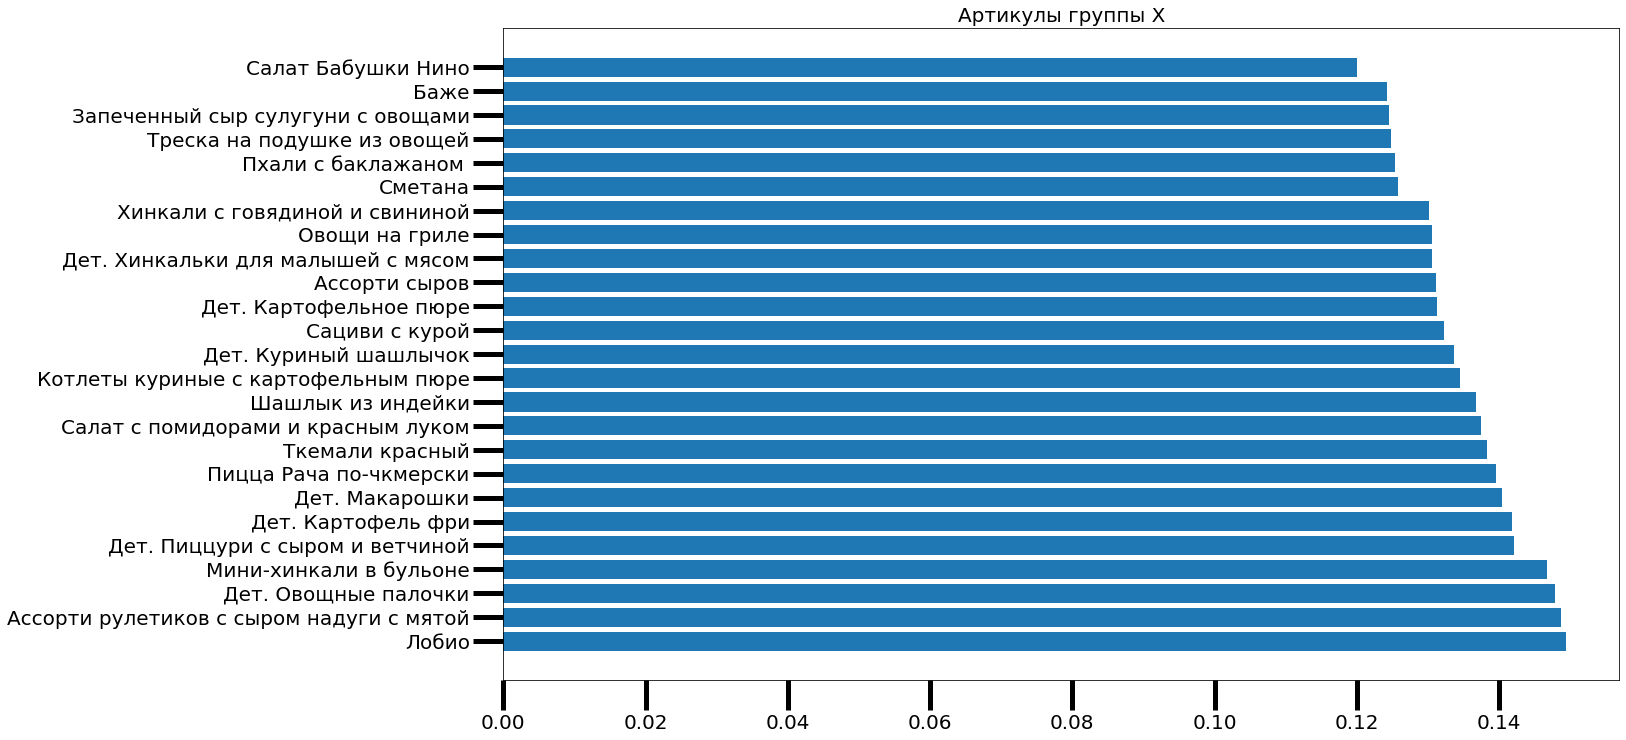

In [24]:
get_group_barchart(df_xyz, 'X')

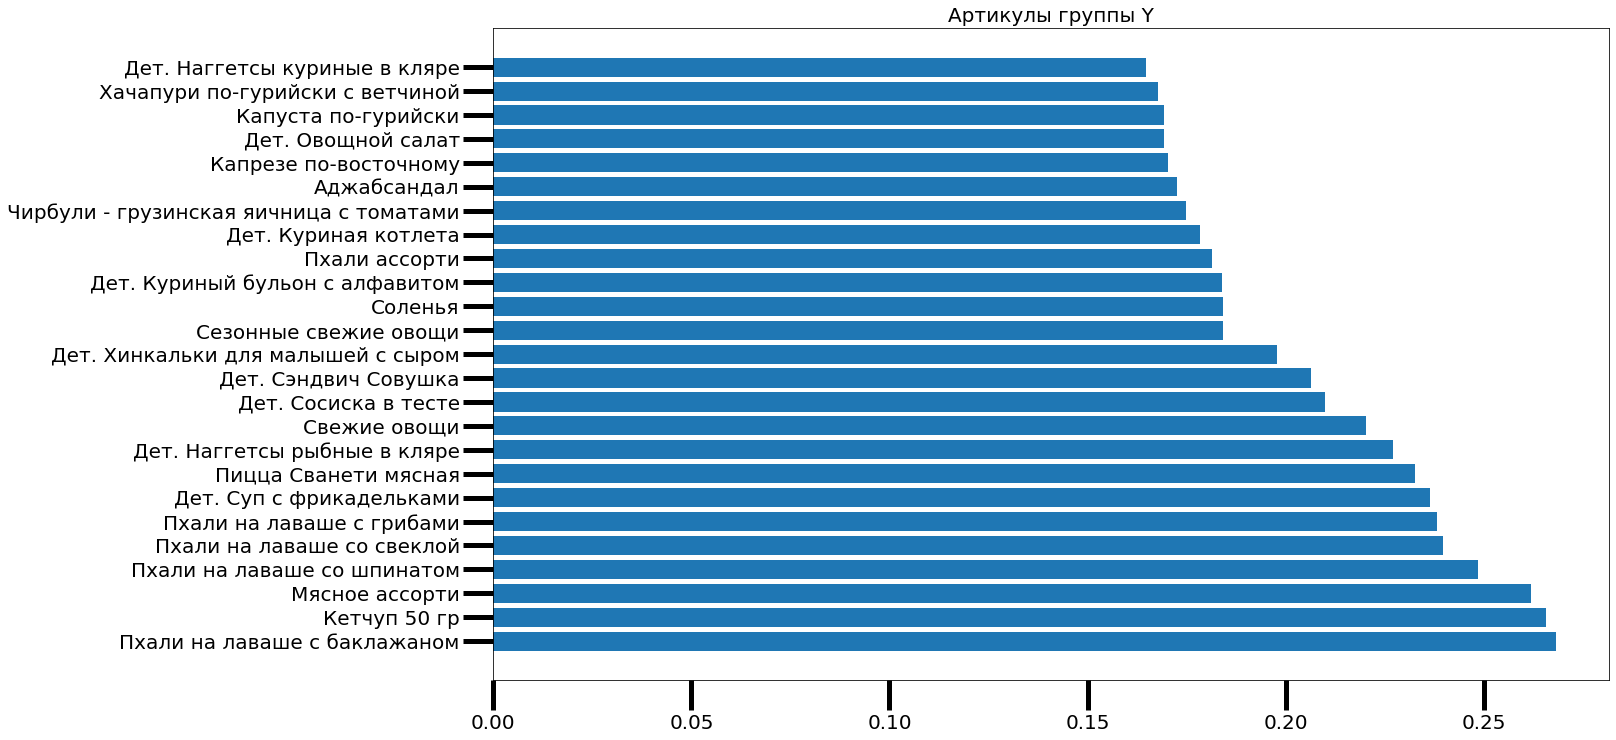

In [25]:
get_group_barchart(df_xyz, 'Y')

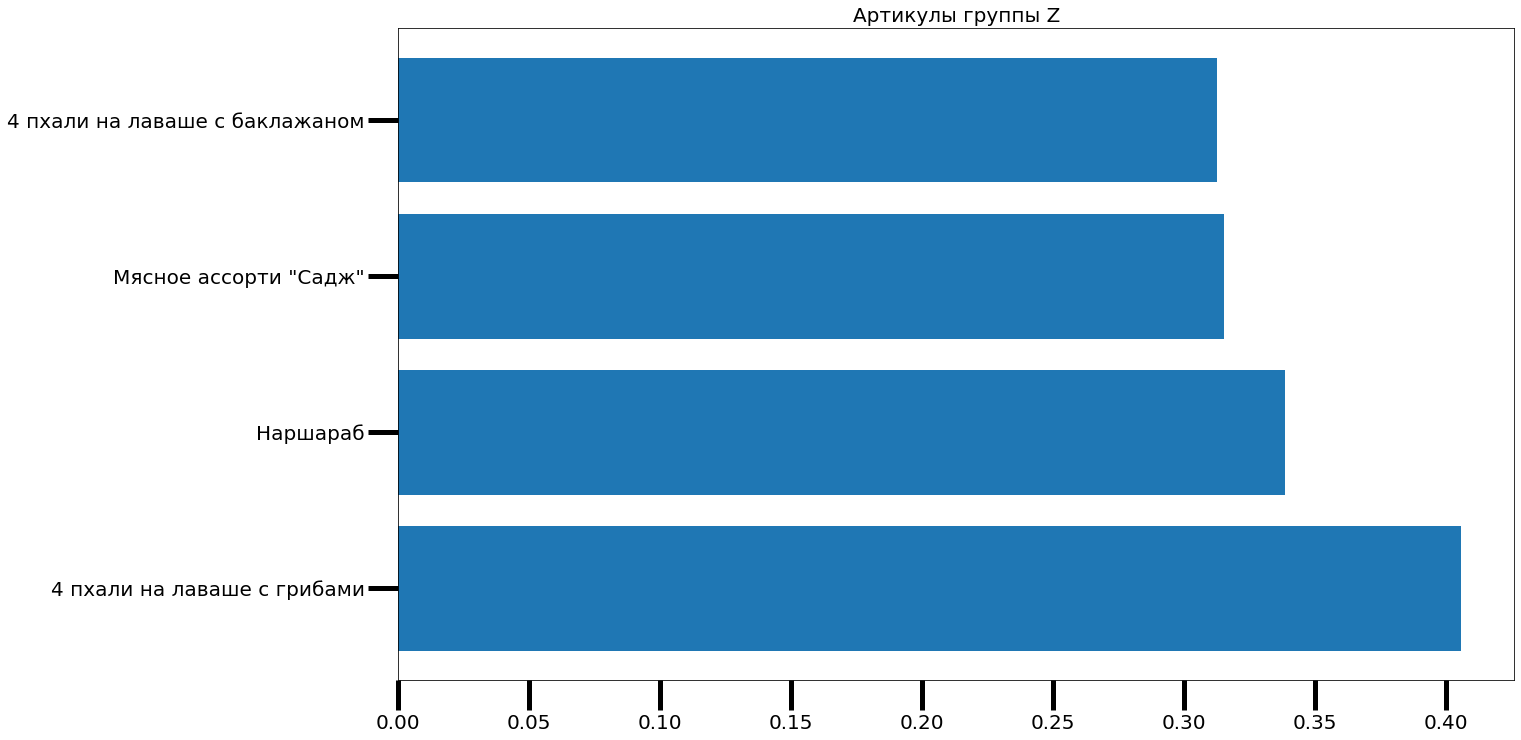

In [26]:
get_group_barchart(df_xyz, 'Z')

Посмотрим на основную группу - хинкали.

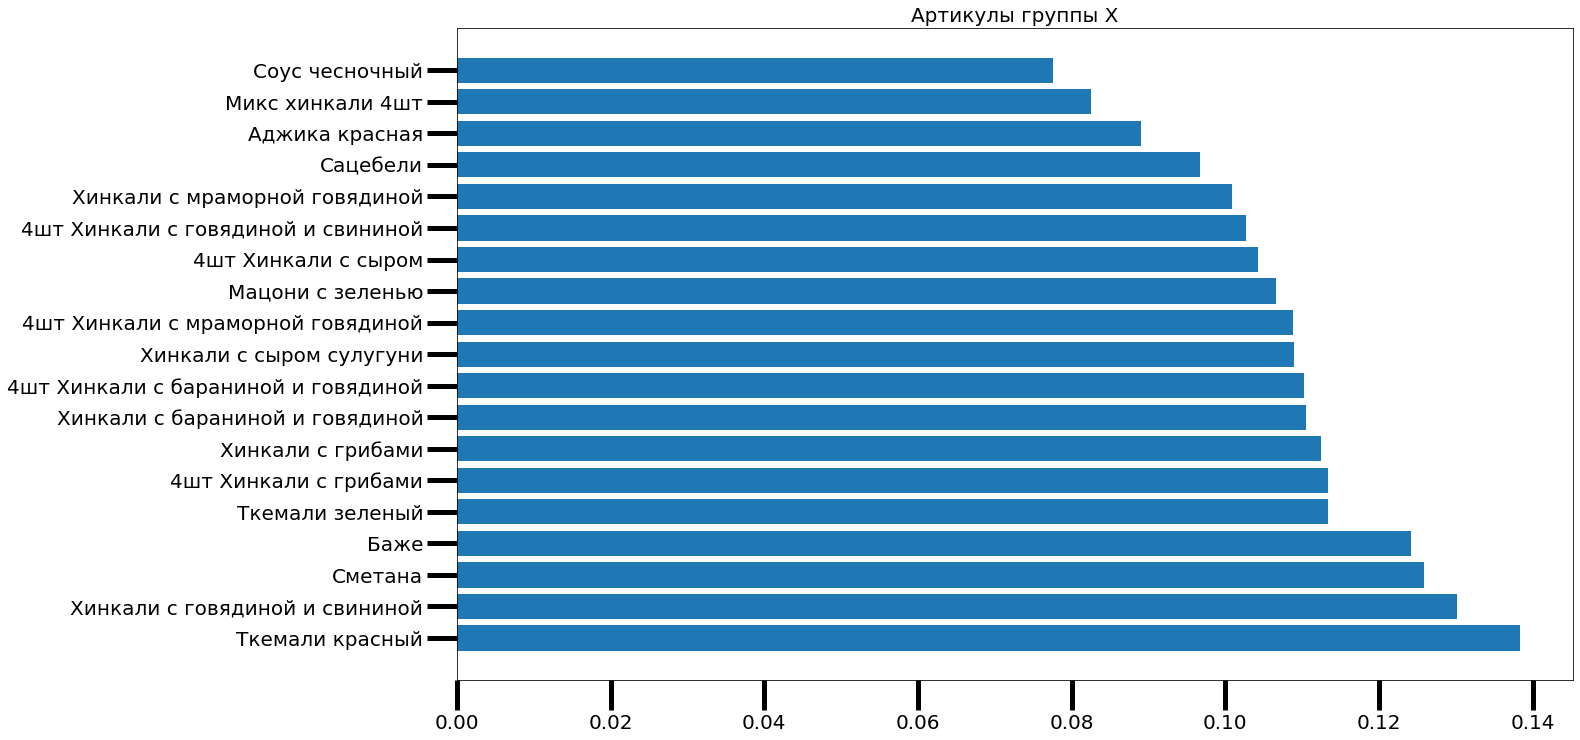

In [27]:
get_group_barchart((df_xyz.loc[df_xyz['subgroup_name']=='Хинкали и соуса']), 'X')

## Выводы и рекомендации

`XYZ–анализ` определяет стабильность продаж блюда за определенный период. Полезен для управления ассортиментом и поставками компонентов для приготовления блюда, организации работы с поставщиками. Результаты позволяют разделить блюда по категориям, определить для них уровень запасов компонентов или заготовок и организацию доставки.

`XYZ–анализ` - только один из компонентов анализа продаж, и его результаты хорошо рассматривать совместно, как минимум, с результатами `ABC-анализа`. 

`Категория Х`
- товары с минимальным колебанием продаж, характеризующиеся стабильной величиной потребления и высокой степенью прогнозирования (до 0,1-0,2)
- Рекомендуется не минимизация запасов, а минимизация управленческих усилий, настраивание поставок компонентов "точно в срок". 
- Рекомендуется использовать результаты `XYZ-анализа` совместно с `ABC-анализом`. В нашем случае для блюд основной группы категории `AAA` - хинкали и некоторые супы и салаты - категория в `XYZ-анализе` также `X`, что означает, что необходимо всегда обеспечивать наличие компонентов для приготовления этих блюд с целью удовлетворять высокий и регулярный спрос на них. 

`Категория Y`
- товары со средним колебанием (от 0,2 до 0,6), с сезонными колебаниями и средними возможностями их прогнозирования.

`Категория Z`
- товары с резкими колебаниями (от 0,6 и выше), с нерегулярным потреблением и непредсказуемыми колебаниями, поэтому, спрогнозировать их спрос невозможно
- в нашем случае мы видим здесь 4 позиции основного меню, которые относятся к категории `CCA` и `CCC`, а следовательно, могут быть рассмотрены как кандидаты на исключение из основного меню.

Рекомендуется провести `XYZ-анализ` в разрезе 
- отдельных ресторанов (стабильность продаж - важный показатель эффективности продаж для каждой точки), - других групп меню (детское, основное, сезонное, барное, чайное и т.д.) для оптимизации закупок ингредиентов и компонентов, а также во избежание отсутствия в наличии в ресторанах блюд групп `A`, `B`
- типов заказа (доставка, самовывоз, алякарт)